In [1]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

%matplotlib inline

In [2]:
os.chdir('/Users/damian/Documents/Thinkful/Mentor/data_science/data/')

In [3]:
dfAllCols = pd.read_csv('ny.gdp.mktp.cd_Indicator_en_csv_v2.csv', skiprows=2)

In [4]:
dfAllCols.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
1966              float64
1967              float64
1968              float64
1969              float64
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
1986              float64
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994        

In [5]:
columns = ['Country Name','Country Code','Indicator Name','Indicator Code',
           '1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
df1999to2010 = pd.read_csv('ny.gdp.mktp.cd_Indicator_en_csv_v2.csv', skiprows=2, usecols=columns)

In [6]:
df1999to2010.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.722799e+09,1.873453e+09,1.920263e+09,1.941095e+09,2.021302e+09,2.228279e+09,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09
1,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1.239840e+09,1.133644e+09,1.264760e+09,1.456199e+09,1.917948e+09,2.322164e+09,2.539759e+09,2.823504e+09,3.245412e+09,3.712034e+09,NaN,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.461666e+09,4.128818e+09,4.583649e+09,5.285462e+09,6.275076e+09,7.057598e+09,9.843851e+09,1.019053e+10,1.248695e+10,1.593678e+10
3,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,6.152923e+09,9.129595e+09,8.936079e+09,1.249735e+10,1.418895e+10,1.964086e+10,2.823370e+10,4.178949e+10,6.044889e+10,8.417808e+10,7.549242e+10,8.247089e+10
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,3.434402e+09,3.686649e+09,4.091020e+09,4.449373e+09,5.652325e+09,7.464447e+09,8.376483e+09,9.132558e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192696e+10


In [7]:
# get UN data
url = "http://web.archive.org/web/20110514112442/http://unstats.un.org/unsd/demographic/products/socind/education.htm"

r = requests.get(url)

In [12]:
soup = BeautifulSoup(r.content)
soup('table')[6]

<table border="0" cellpadding="0" cellspacing="0" width="800">
<tr valign="top">
<td><!-- #BeginEditable "MainContent" -->
<table align="center" border="0" width="540">
<tr>
<td cllcontsubhd="" colspan="2" valign="bottom"><h2 align="center"><a name="Top"></a>Social 
              indicators </h2></td>
</tr>
<tr>
<td cllcontsubhd="" colspan="2" height="23" valign="top"><div align="center" class="csubhd"><a href="default.htm">Introduction</a> 
              | <a href="statistics.htm">Statistics</a></div></td>
</tr>
</table>
<table cellpadding="0" cellspacing="0">
<tr>
<td height="1" width="797"><div align="right">
<p class="Clear"><a href="Education_Dec2010.xls" style="color: #666; font-weight: bold">Download data</a> <a href="Education_Dec2010.xls"><img alt="Excel" border="0" height="21" name="Excel" src="/web/20110514112442im_/http://unstats.un.org/unsd/img/excel.gif" width="22"/></a></p>
<div align="left">
<table align="left" cellpadding="0" cellspacing="0">
<tr class="bar1">
<td cols

In [37]:
A = soup('table')[6].findAll('tr')

5


In [23]:
B = [x for x in A if len(x)==25] #removing records without value
print B[0]

<tr class="tcont">
<td height="19">Afghanistan</td>
<td align="right" height="19">2004</td>
<td height="19"> </td>
<td height="19">a</td>
<td align="right" height="19" width="71">8</td>
<td width="6"></td>
<td height="19" width="51"></td>
<td align="right" height="19" width="72">11</td>
<td width="6"></td>
<td height="19" width="53"></td>
<td align="right" height="19" width="64">5</td>
<td height="19" width="59"></td>
</tr>


In [11]:
print(len(B))

183


In [29]:
B[0].findAll('td')[4].string

u'8'

In [30]:
records = []

for rows in B:
    col = rows.findAll('td')
    country = col[0].string
    year = col[1].string
    total = col[4].string
    men = col[7].string
    women = col[10].string
    record = (country, year, total, men, women)
    records.append(record)

column_name = ['country', 'year', 'total', 'men', 'women']

table = pd.DataFrame(records, columns = column_name)

In [32]:
table.head()

,country,year,total,men,women
0,Afghanistan,2004,8,11,5
1,Albania,2004,11,11,11
2,Algeria,2005,13,13,13
3,Andorra,2008,11,11,12
4,Anguilla,2008,11,11,11


In [33]:
len(table)

183

In [34]:
table.year.unique().tolist()

[u'2004',
 u'2005',
 u'2008',
 u'2000',
 u'2007',
 u'2009',
 u'2006',
 u'2001',
 u'2002',
 u'2003',
 u'2010',
 u'1999']

In [15]:
# compare the length of the two frames
#print len(df1999to2010)
print len(table)

183


In [16]:
table.head()

,country,year,total,men,women
0,Afghanistan,2004,8,11,5
1,Albania,2004,11,11,11
2,Algeria,2005,13,13,13
3,Andorra,2008,11,11,12
4,Anguilla,2008,11,11,11


In [17]:
table.set_index('country', inplace=True)

In [18]:
table.head()

,year,total,men,women
country,,,,
Afghanistan,2004,8,11,5
Albania,2004,11,11,11
Algeria,2005,13,13,13
Andorra,2008,11,11,12
Anguilla,2008,11,11,11


In [19]:
df1999to2010.set_index('Country Name', inplace=True)

In [20]:
merged = pd.merge(table, df1999to2010, how='inner', left_index=True, right_index=True)

In [21]:
merged.head()

,year,total,men,women,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Aruba,2009,13,13,13,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.722799e+09,1.873453e+09,1.920263e+09,1.941095e+09,2.021302e+09,2.228279e+09,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09
Andorra,2008,11,11,12,AND,GDP (current US$),NY.GDP.MKTP.CD,1.239840e+09,1.133644e+09,1.264760e+09,1.456199e+09,1.917948e+09,2.322164e+09,2.539759e+09,2.823504e+09,3.245412e+09,3.712034e+09,NaN,NaN
Afghanistan,2004,8,11,5,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.461666e+09,4.128818e+09,4.583649e+09,5.285462e+09,6.275076e+09,7.057598e+09,9.843851e+09,1.019053e+10,1.248695e+10,1.593678e+10
Albania,2004,11,11,11,ALB,GDP (current US$),NY.GDP.MKTP.CD,3.434402e+09,3.686649e+09,4.091020e+09,4.449373e+09,5.652325e+09,7.464447e+09,8.376483e+09,9.132558e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192696e+10
United Arab Emirates,2003,11,11,12,ARE,GDP (current US$),NY.GDP.MKTP.CD,8.444548e+10,1.043374e+11,1.033116e+11,1.098162e+11,1.243464e+11,1.478244e+11,1.806170e+11,2.221059e+11,2.579161e+11,3.154746e+11,2.535475e+11,2.860493e+11


In [22]:
merged['CommonYear'] = merged.apply(lambda x: x['year'], axis=1)
merged['CommonGDP'] = merged.apply(lambda x: x[x['year']], axis=1)

In [23]:
merged.head()

,year,total,men,women,Country Code,Indicator Name,Indicator Code,1999,2000,2001,...,2003,2004,2005,2006,2007,2008,2009,2010,CommonYear,CommonGDP
Aruba,2009,13,13,13,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.722799e+09,1.873453e+09,1.920263e+09,...,2.021302e+09,2.228279e+09,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2009,2.498933e+09
Andorra,2008,11,11,12,AND,GDP (current US$),NY.GDP.MKTP.CD,1.239840e+09,1.133644e+09,1.264760e+09,...,1.917948e+09,2.322164e+09,2.539759e+09,2.823504e+09,3.245412e+09,3.712034e+09,NaN,NaN,2008,3.712034e+09
Afghanistan,2004,8,11,5,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.461666e+09,...,4.583649e+09,5.285462e+09,6.275076e+09,7.057598e+09,9.843851e+09,1.019053e+10,1.248695e+10,1.593678e+10,2004,5.285462e+09
Albania,2004,11,11,11,ALB,GDP (current US$),NY.GDP.MKTP.CD,3.434402e+09,3.686649e+09,4.091020e+09,...,5.652325e+09,7.464447e+09,8.376483e+09,9.132558e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192696e+10,2004,7.464447e+09
United Arab Emirates,2003,11,11,12,ARE,GDP (current US$),NY.GDP.MKTP.CD,8.444548e+10,1.043374e+11,1.033116e+11,...,1.243464e+11,1.478244e+11,1.806170e+11,2.221059e+11,2.579161e+11,3.154746e+11,2.535475e+11,2.860493e+11,2003,1.243464e+11


In [24]:
finalDataFrame = merged[['year', 'total', 'men', 'women', 'CommonGDP']]

In [25]:
finalDataFrame.head()

,year,total,men,women,CommonGDP
Aruba,2009,13,13,13,2.498933e+09
Andorra,2008,11,11,12,3.712034e+09
Afghanistan,2004,8,11,5,5.285462e+09
Albania,2004,11,11,11,7.464447e+09
United Arab Emirates,2003,11,11,12,1.243464e+11


In [26]:
    import numpy as np
    finalDataFrame['logGDP'] = np.log(finalDataFrame['CommonGDP']) 

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [27]:
    finalDataFrame.sort('CommonGDP', ascending=True, inplace=True)

/Library/Python/2.7/site-packages/pandas/core/frame.py:2915: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=inplace, kind=kind, na_position=na_position)


In [28]:
finalDataFrame.head()

,year,total,men,women,CommonGDP,logGDP
Tuvalu,2001,11,10,11,1.319625e+07,16.395444
Kiribati,2008,12,12,12,1.350445e+08,18.721115
Palau,2000,15,14,15,1.598557e+08,18.889782
Sao Tome and Principe,2010,11,11,11,2.010379e+08,19.119004
Tonga,2004,14,14,14,2.407946e+08,19.299455


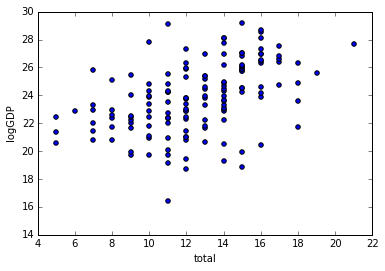

In [39]:
finalDataFrame.plot(kind='scatter', x='total', y='logGDP')

In [30]:
finalDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, Tuvalu to Turks and Caicos Islands
Data columns (total 6 columns):
year         149 non-null object
total        149 non-null object
men          149 non-null object
women        149 non-null object
CommonGDP    147 non-null float64
logGDP       147 non-null float64
dtypes: float64(2), object(4)
memory usage: 8.1+ KB


In [31]:
pd.set_option('max_rows', 150)

In [32]:
finalDataFrame = finalDataFrame.dropna(how='any', axis=0)

In [36]:
finalDataFrame.total = finalDataFrame.total.astype(int)

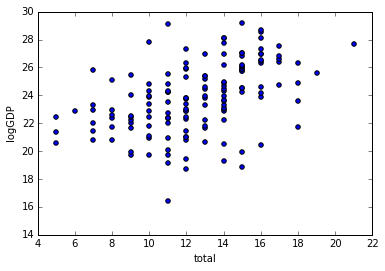

In [38]:
finalDataFrame.plot(kind='scatter', x='total', y='logGDP')

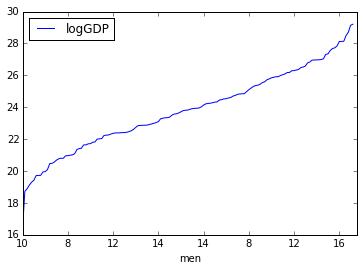

In [43]:
finalDataFrame.plot('men', 'logGDP')

In [44]:
finalDataFrame['deltaAttainment'] = finalDataFrame['men'].astype('int') - finalDataFrame['women'].astype('int')

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
sDeltas = finalDataFrame.deltaAttainment.value_counts()

In [46]:
sDeltas = sDeltas.sort_index(ascending=True)

In [47]:
sDeltas

-4     1
-3     5
-2    10
-1    45
 0    46
 1    22
 2    12
 3     4
 4     3
 6     1
dtype: int64

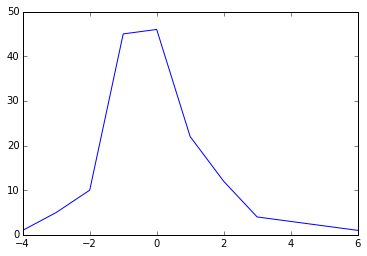

In [48]:
sDeltas.plot()

In [49]:
merged.head()

,year,total,men,women,Country Code,Indicator Name,Indicator Code,1999,2000,2001,...,2003,2004,2005,2006,2007,2008,2009,2010,CommonYear,CommonGDP
Aruba,2009,13,13,13,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.722799e+09,1.873453e+09,1.920263e+09,...,2.021302e+09,2.228279e+09,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2009,2.498933e+09
Andorra,2008,11,11,12,AND,GDP (current US$),NY.GDP.MKTP.CD,1.239840e+09,1.133644e+09,1.264760e+09,...,1.917948e+09,2.322164e+09,2.539759e+09,2.823504e+09,3.245412e+09,3.712034e+09,NaN,NaN,2008,3.712034e+09
Afghanistan,2004,8,11,5,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.461666e+09,...,4.583649e+09,5.285462e+09,6.275076e+09,7.057598e+09,9.843851e+09,1.019053e+10,1.248695e+10,1.593678e+10,2004,5.285462e+09
Albania,2004,11,11,11,ALB,GDP (current US$),NY.GDP.MKTP.CD,3.434402e+09,3.686649e+09,4.091020e+09,...,5.652325e+09,7.464447e+09,8.376483e+09,9.132558e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192696e+10,2004,7.464447e+09
United Arab Emirates,2003,11,11,12,ARE,GDP (current US$),NY.GDP.MKTP.CD,8.444548e+10,1.043374e+11,1.033116e+11,...,1.243464e+11,1.478244e+11,1.806170e+11,2.221059e+11,2.579161e+11,3.154746e+11,2.535475e+11,2.860493e+11,2003,1.243464e+11
